## Import Necessary Libraries

In [26]:
import numpy as np
import keras
from  keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import os
import pandas as pd
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import scikitplot
from scikitplot.metrics import plot_confusion_matrix
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()
import nltk

# Create a Dataframe for reading and analysing the text files easily

In [27]:
df_train = pd.read_csv('data/train.txt', header =None, names = ['Input','Sentiment'], encoding='utf-8')
df_test = pd.read_csv('data/test.txt', header = None, names = ['Input','Sentiment'],encoding='utf-8')
df_val=pd.read_csv('data/val.txt',header=None,names=['Input','Sentiment'],encoding='utf-8')

In [28]:
df_train.Sentiment.value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Sentiment, dtype: int64

## Reading the Train and Validation Data

In [29]:
X=df_train['Input']
X = [stemmer.stem(word.lower()) for word in X]

In [30]:
lst=[]
for i in X:
    lst.append(len(i))


In [31]:
len1=pd.DataFrame(lst)
len1.describe()

,0
count,16000.000000
mean,96.837937
std,55.902815
min,7.000000
25%,53.000000
50%,86.000000
75%,129.000000
max,300.000000


In [32]:
cts=[]
for i in range(7,301):
    ct=0
    for k in lst:
        if k==i:
            ct+=1
    cts.append(ct)

# Trying to fix a length for the embedding layers' input

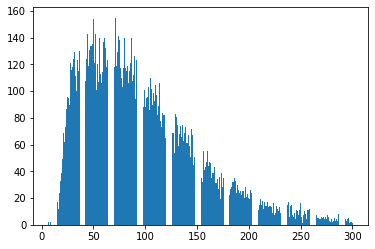

In [33]:
plt.bar(range(7,301),cts)
plt.show()

# Using The tokenizer Class to convert the sentences into word vectors

In [34]:
tokenizer=Tokenizer(15212,lower=True,oov_token='UNK')
tokenizer.fit_on_texts(X)
X[0]

'i didnt feel humiliated'

In [35]:
len(tokenizer.word_index)

15252

In [36]:
X_train=tokenizer.texts_to_sequences(X)
print(X_train[0])
X_train_pad=pad_sequences(X_train,maxlen=80,padding='post')
print(X_train_pad[0])

[2, 139, 3, 692]
[  2 139   3 692   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0]


In [37]:
df_train['Sentiment']=df_train['Sentiment'].replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [38]:
Y_train=df_train['Sentiment'].values


# One hot Encoding the Emotion Values

In [39]:
Y_train_f=to_categorical(Y_train)

In [40]:
print(X_train_pad,'\n\n',Y_train_f[:6])

[[   2  139    3 ...    0    0    0]
 [   2   40  101 ...    0    0    0]
 [  17 3060    7 ...    0    0    0]
 ...
 [   2    3  327 ...    0    0    0]
 [   2    3   14 ...    0    0    0]
 [   2   47    7 ...    0    0    0]] 

 [[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


In [41]:
X_val=df_val['Input']
X_val = [stemmer.stem(word.lower()) for word in X_val]
Y_val=df_val.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [42]:
X_val_f=tokenizer.texts_to_sequences(X_val)
X_val_pad=pad_sequences(X_val_f,maxlen=80,padding='post')

In [43]:
Y_val_f=to_categorical(Y_val)

In [44]:
X_train_pad[:6]

array([[   2,  139,    3,  692,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [   2,   40,  101,   60,    8,   15,  493,    5,   15, 3496,  553,
          32,   60,   61,  128,  148,   76, 1479,    4,   22, 1254,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           

In [45]:
from keras.models import Sequential
from keras.layers import LSTM,Bidirectional,Dense,Embedding,Dropout


# Creating a Model

In [46]:
model=Sequential()
model.add(Embedding(15212,64,input_length=80))
model.add(Dropout(0.6))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(Bidirectional(LSTM(160)))
model.add(Dense(6,activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 80, 64)            973568    
_________________________________________________________________
dropout_1 (Dropout)          (None, 80, 64)            0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 80, 160)           92800     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 320)               410880    
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 1926      
Total params: 1,479,174
Trainable params: 1,479,174
Non-trainable params: 0
_________________________________________________________________
None


# Compiling and running the model

In [47]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [48]:
print(X_train_pad,'\n\n',Y_train_f)

[[   2  139    3 ...    0    0    0]
 [   2   40  101 ...    0    0    0]
 [  17 3060    7 ...    0    0    0]
 ...
 [   2    3  327 ...    0    0    0]
 [   2    3   14 ...    0    0    0]
 [   2   47    7 ...    0    0    0]] 

 [[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


In [49]:
hist=model.fit(X_train_pad,Y_train_f,epochs=12,validation_data=(X_val_pad,Y_val_f))

Epoch 1/12
500/500 [==============================] - 95s 190ms/step - loss: 1.2143 - accuracy: 0.5168 - val_loss: 0.6414 - val_accuracy: 0.7635
Epoch 2/12
500/500 [==============================] - 83s 166ms/step - loss: 0.4994 - accuracy: 0.8202 - val_loss: 0.3306 - val_accuracy: 0.8940
Epoch 3/12
500/500 [==============================] - 83s 166ms/step - loss: 0.2886 - accuracy: 0.9021 - val_loss: 0.2225 - val_accuracy: 0.9185
Epoch 4/12
500/500 [==============================] - 86s 173ms/step - loss: 0.2040 - accuracy: 0.9259 - val_loss: 0.2097 - val_accuracy: 0.9210
Epoch 5/12
500/500 [==============================] - 86s 172ms/step - loss: 0.1674 - accuracy: 0.9384 - val_loss: 0.1927 - val_accuracy: 0.9295
Epoch 6/12
500/500 [==============================] - 98s 196ms/step - loss: 0.1403 - accuracy: 0.9456 - val_loss: 0.1789 - val_accuracy: 0.9230
Epoch 7/12
500/500 [==============================] - 93s 185ms/step - loss: 0.1101 - accuracy: 0.9574 - val_loss: 0.1877 - val_ac

# Plotting the Loss and Accuracy Curves

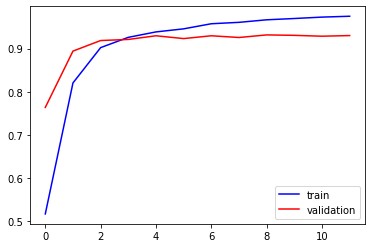

In [50]:
plt.plot(hist.history['accuracy'],c='b',label='train')
plt.plot(hist.history['val_accuracy'],c='r',label='validation')
plt.legend(loc='lower right')
plt.show()

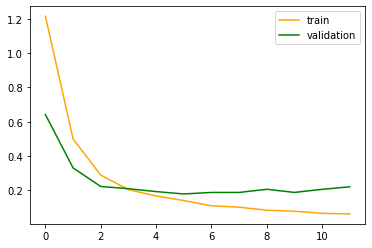

In [51]:
plt.plot(hist.history['loss'],c='orange',label='train')
plt.plot(hist.history['val_loss'],c='g',label='validation')
plt.legend(loc='upper right')
plt.show()

# Checking for Test Data

In [52]:
X_test=df_test['Input']
X_test = [stemmer.stem(word.lower()) for word in X_test]
Y_test=df_test.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [53]:
X_test_f=tokenizer.texts_to_sequences(X_test)
X_test_pad=pad_sequences(X_test_f,maxlen=80,padding='post')

In [54]:
Y_test_f=to_categorical(Y_test)

In [55]:
X_test_pad.shape

(2000, 80)

In [56]:
Y_test_f[:7]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

#Accuracy for Test Data

In [57]:
model.evaluate(X_test_pad,Y_test_f)

63/63 [==============================] - 3s 45ms/step - loss: 0.2053 - accuracy: 0.9280


[0.20533455908298492, 0.9279999732971191]

# Plotting the Confusion matrix 

In [58]:
Y_pred=model.predict_classes(X_test_pad)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

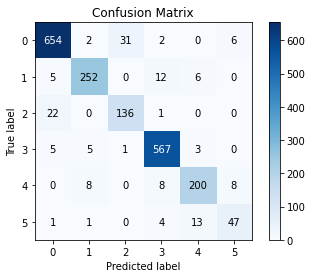

In [59]:
plot_confusion_matrix(Y_test,Y_pred)

In [60]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       695
           1       0.94      0.92      0.93       275
           2       0.81      0.86      0.83       159
           3       0.95      0.98      0.97       581
           4       0.90      0.89      0.90       224
           5       0.77      0.71      0.74        66

    accuracy                           0.93      2000
   macro avg       0.89      0.88      0.88      2000
weighted avg       0.93      0.93      0.93      2000



# Creating a Function to check for Your own Sentence

In [61]:
def get_key(value):
    dictionary={'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5}
    for key,val in dictionary.items():
          if (val==value):
            return key



In [68]:
def predict(sentence):
    sentence_lst=[]
    sentence_lst.append(sentence)
    sentence_seq=tokenizer.texts_to_sequences(sentence_lst)
    print(sentence_seq)
    sentence_padded=pad_sequences(sentence_seq,maxlen=80,padding='post')
    ans=get_key(model.predict_classes(sentence_padded))
    print("The emotion predicted is",ans)

In [63]:
sentence = 'let it be hell'
sentence_lst=[]
sentence_lst.append(sentence)
sentence_seq=tokenizer.texts_to_sequences(sentence_lst)
sentence_padded=pad_sequences(sentence_seq,maxlen=80,padding='post')
ans=get_key(model.predict_classes(sentence_padded))
print("The emotion predicted is",ans)
print(sentence_padded)

The emotion predicted is anger
[[ 207   13   28 1019    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]]


# Check for Your Own Sentence

In [69]:
predict(str(input('Enter a sentence : ')))


Enter a sentence : haiaiaud
[[1]]
The emotion predicted is anger


In [65]:
predict(str(input('Enter a sentence : ')))


Enter a sentence : this world is beautiful
The emotion predicted is joy


In [66]:
predict(str(input('Enter a sentence : ')))


Enter a sentence : life is a war
The emotion predicted is joy


In [74]:
import pickle
model.save('emotion_LSTM.h5',model)
pickle.dump( {'train_x':X, 'train_y':Y_train_f}, open( "mood_learning.pkl", "wb" ) )